In [6]:
import numpy as np
import pandas as pd

## Questions

1. What's your method of creating generalized functions? I have two ways in mind. (1) Create body of func, then create func name or (2) Create func name along with/before body.

# 2.1

- The following are temperature measurements z${_t}$ made every minute on a chemical reactor:
    1. Plot the time series.
    2. Plot 𝑧𝑡+1 versus 𝑧𝑡.
    3. Plot 𝑧𝑡+2 versus 𝑧𝑡.
    4. After inspecting the graphs, do you think that the series is autocorrelated?

## Data 

In [85]:
data = [200, 202, 208, 204, 204, 207, 207, 204, 202, 199, 201, 198, 200, 
        202, 203, 205, 207, 211, 204, 206, 203, 203, 201, 198, 200, 206, 
        207, 206, 200, 203, 203, 200, 200, 195, 202, 204, 207, 206, 200]

# print("data : ", data)

pre_plot = pd.DataFrame({
    'temperature measurements' : data
    })

# print("pre_plot : ", pre_plot)

## Q1 Plots w/ mini analysis

1. Histogram : Temp to occour the most is 204 and the least is a tie between 4 of them
2. Line : Over the course of 39 temps, $ \exists $ a main peak between 15 - 20 w/ 3 other minor peaks. Starting temp is same/similar to ending temp
3. Density : "Generate Kernel Density Estimate plot using Gaussian kernels." So, we are estimating this distribution's **probability density function** using **kernel density estimate**
4. KDE : same as (3) Density

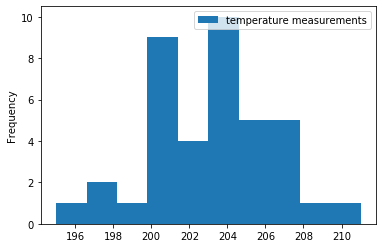

In [86]:
plot_histogram = pre_plot.plot.hist()

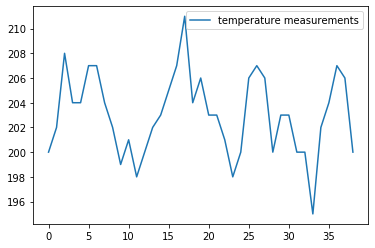

In [87]:
plot_line = pre_plot.plot.line()

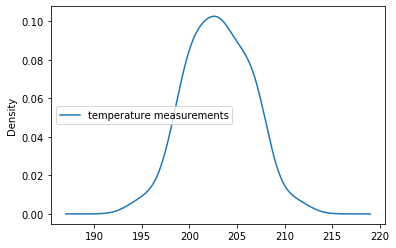

In [88]:
plot_density = pre_plot.plot.density()

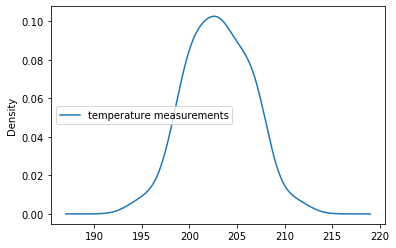

In [89]:
plot_kde = pre_plot.plot.kde()

In [ ]:
temp_avg = pre_plot['temperature measurements'].mean()
print("temp_avg : ", temp_avg)

---
 
## Q2 & Q3 Plots w/ mini analysis
1. W/ each plot, $ \nexists $ a shift which is noticeable unless there's a significant difference between t & k of z$ {_t}{_+}{_k} $
2. [ ] Basic stats sa : mean, median, range, etc will remain the same bc we're only increasing by a factor of k? 

In [151]:
## DATA PREP

t_plus_one_arr = []
t_plus_two_arr = []

for t in range(len(data)) : 
    # print("data[t] : ", t, data[t])
    t_plus_one = data[t] + 1
    t_plus_one_arr.append(t_plus_one)
    
    t_plus_two = data[t] + 10
    t_plus_two_arr.append(t_plus_two)

# print("\noriginal data : ", data)
# print("\nt_plus_one_arr : ", t_plus_one_arr)
# print("\nt_plus_two_arr : ", t_plus_two_arr)


new_pre_plot = pd.DataFrame({
    'temperature measurements' : data,
    'temperature measurements + 1' : t_plus_one_arr,
    'temperature measurements + 2' : t_plus_two_arr
    })

# print("new_pre_plot : ", new_pre_plot)

t_m = new_pre_plot['temperature measurements']
t_m_1 = new_pre_plot['temperature measurements + 1']
t_m_2 = new_pre_plot['temperature measurements + 2']

In [152]:
def plot_histogram(z_t1, z_t2) :
    org_histogram = t_m.plot.hist()
    p1_histogram = t_m_1.plot.hist()

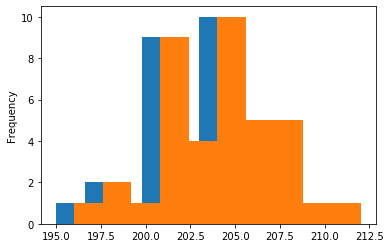

In [153]:
# z vs z_t+1
plot_histogram(t_m, t_m_1)

In [154]:
def plot_histogram(z_t1, z_t2) :
    org_histogram = t_m.plot.hist()
    p2_histogram = t_m_2.plot.hist()

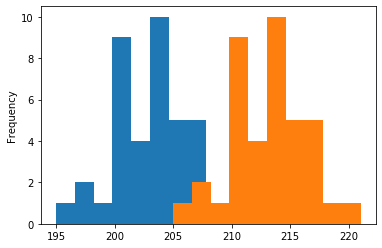

In [155]:
# z vs z_t+2
plot_histogram(t_m, t_m_2)

### TODO : Fix the below to properly display z$ {_t} $ vs z$ {_t}{_+}{_1} $ & z$ {_t}{_+}{_2} $, respectively

In [129]:
def plot_line(z_t, new_z_t) :
    plot_line = t_m.plot.line()
    plot_line = t_m_1.plot.line()

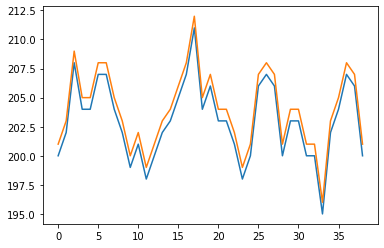

In [130]:
# z vs z_t+1
plot_line(t_m, t_m_1)

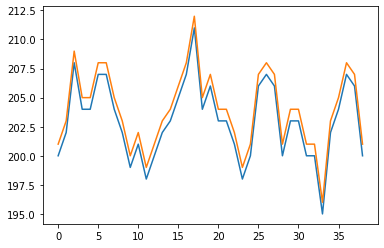

In [131]:
# z vs z_t+2
plot_line(t_m, t_m_2)

In [119]:
def plot_density(z_t, new_z_t) :
    plot_density = t_m.plot.density()
    plot_density = t_m_1.plot.density()

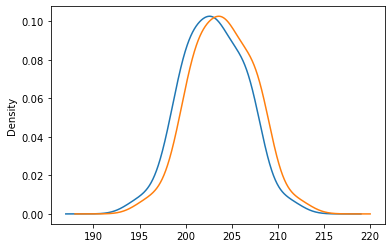

In [120]:
# z vs z_t+1
plot_density(t_m, t_m_1)

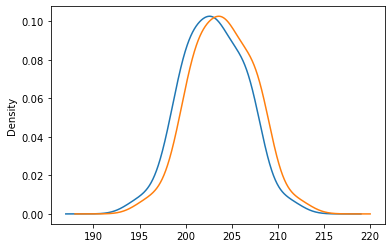

In [121]:
# z vs z_t+2
plot_density(t_m, t_m_2)

---

# Self-Discovery

1. Gathering of basics stats - total, mean, median, mode, range, and standard deviation

In [40]:
def get_temp_stats(total, mean, median, mode, interval, sd) :

    temp_stats = []
    temp_dict = {}
    
    temp_stats.append(total)
    temp_stats.append(mean)
    temp_stats.append(median)
    temp_stats.append(mode)
    temp_stats.append(interval)
    temp_stats.append(sd)
    
    temp_names = ["total", "mean", "median", "mode", "interval", "sd"]
    # print("temp_stats : ", temp_stats)
    

# map temp_names to their value, respectively
    for key in temp_names :
        # print("key : ", key)
        for value in temp_stats :
            # print("value : ", value)
            temp_dict[key] = value
            temp_stats.remove(value)
            
#            break statement in Python terminates the current loop and resumes execution at the next statement which means to 
#                populate, then break to go to next key : value pair
            break
    return temp_dict

In [41]:
t_m = pre_plot['temperature measurements']

temp_total = t_m.sum()
# print("temp_total : ", temp_total, "\n")

temp_mean = t_m.mean()
# print("temp_mean : ", temp_mean)

temp_median = t_m.median()

temp_max = t_m.max()
temp_min = t_m.min()
temp_range = temp_max - temp_min

temp_sd = t_m.std()

In [42]:
get_temp_stats(temp_total, temp_mean, temp_median, temp_max, temp_range, temp_sd)

{'total': 7918,
 'mean': 203.02564102564102,
 'median': 203.0,
 'mode': 211,
 'interval': 16,
 'sd': 3.3204880703958306}